In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading the dataset
data=pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
scaler=StandardScaler()
data['Amount']=scaler.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data.shape

(284807, 30)

In [ ]:
data.duplicated().any()

np.True_

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(275663, 30)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


In [ ]:
x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42)

In [ ]:
#undersampling
legit=data[data['Class']==0]
fraud=data[data['Class']==1]

In [ ]:
legit.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

In [ ]:
legit_sample=legit.sample(n=473)
legit_sample.shape

(473, 30)

In [ ]:
new_data=pd.concat([legit_sample,fraud],ignore_index=True)

In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.482444,1.823830,-2.730445,1.234814,1.565788,-0.354323,0.397821,0.507734,-0.708476,-1.289576,1.301042,-0.081047,0.156748,-3.097041,0.678124,1.252733,2.518294,2.023051,0.025920,0.015710,-0.114458,-0.188027,-0.018598,-1.685229,-0.353238,-0.302487,0.144322,-0.074227,-0.349671,0
1,2.001039,0.045589,-2.069442,0.400902,0.504575,-1.065049,0.363385,-0.387748,0.569872,-0.509931,-0.946607,0.050234,0.575070,-0.847845,0.911943,0.408779,0.099935,0.702986,-0.170178,-0.038699,0.185511,0.608834,-0.168602,-0.764649,0.347603,-0.064334,-0.011200,-0.027932,-0.112745,0
2,1.041707,-1.194866,1.492430,0.120872,-1.682260,0.894167,-1.425005,0.439100,0.072387,0.526185,0.675035,1.110425,0.269674,-0.727485,-1.117251,-1.660831,0.352675,1.160154,-0.707141,-0.379030,-0.278856,-0.151718,0.005528,0.052841,0.064304,0.587075,0.054423,0.030249,-0.028905,0
3,-0.848154,-1.254213,2.349567,-0.107511,-1.224439,0.636706,-0.658934,0.331388,-0.323483,-0.039076,-0.821197,-0.142272,0.606565,-1.278300,-0.597664,-0.161936,1.430948,-1.558865,1.685993,0.744324,0.384729,1.014632,0.374087,0.142356,-0.332888,-0.024919,0.161837,0.174715,0.366426,0
4,1.675526,-0.846906,-1.888228,0.553986,1.968128,4.204171,-0.718495,1.049905,1.008477,-0.051788,-0.540240,0.750089,-0.353291,-0.040451,-0.780505,-0.481719,-0.130587,-0.979821,0.046888,0.042233,-0.449725,-1.402264,0.365804,0.622978,-0.328597,-1.097928,0.049951,-0.014658,0.185233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [ ]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42)

LOGISTIC REGRESSION

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_pred1))
print('Precision=',precision_score(y_test,y_pred1))
print('Recall=',recall_score(y_test,y_pred1))
print('F1 score=',f1_score(y_test,y_pred1))

Accuracy= 0.9315789473684211
Precision= 0.9494949494949495
Recall= 0.9215686274509803
F1 score= 0.9353233830845771


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_pred2))
print('Precision=',precision_score(y_test,y_pred2))
print('Recall=',recall_score(y_test,y_pred2))
print('F1 score=',f1_score(y_test,y_pred2))

Accuracy= 0.9157894736842105
Precision= 0.9215686274509803
Recall= 0.9215686274509803
F1 score= 0.9215686274509803


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_pred3))
print('Precision=',precision_score(y_test,y_pred3))
print('Recall=',recall_score(y_test,y_pred3))
print('F1 score=',f1_score(y_test,y_pred3))

Accuracy= 0.9421052631578948
Precision= 0.989247311827957
Recall= 0.9019607843137255
F1 score= 0.9435897435897436


In [ ]:
import seaborn as sns
final_data=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100],
              })
final_data


,Model,Accuracy
0,Logistic Regression,93.157895
1,Decision Tree,91.578947
2,Random Forest,94.210526


<Axes: xlabel='Model', ylabel='Accuracy'>

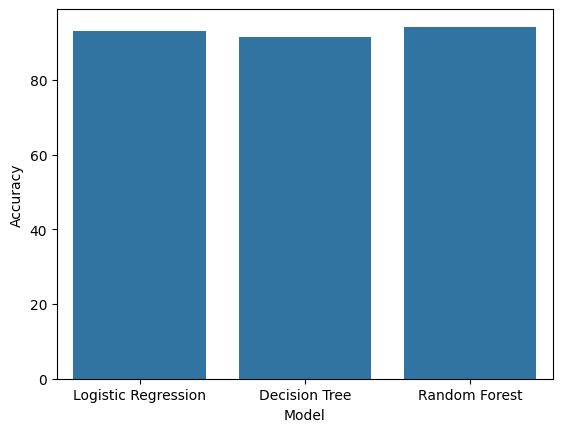

In [ ]:
sns.barplot(x='Model', y='Accuracy', data=final_data)

In [ ]:
pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Precision':[precision_score(y_test,y_pred1)*100,
                          precision_score(y_test,y_pred2)*100,
                          precision_score(y_test,y_pred3)*100],
              })

,Model,Precision
0,Logistic Regression,94.949495
1,Decision Tree,92.156863
2,Random Forest,98.924731


In [ ]:

pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Recall':[recall_score(y_test,y_pred1)*100,
                          recall_score(y_test,y_pred2)*100,
                          recall_score(y_test,y_pred3)*100],
              })


,Model,Recall
0,Logistic Regression,92.156863
1,Decision Tree,92.156863
2,Random Forest,90.196078


In [ ]:
pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'F1_score':[f1_score(y_test,y_pred1)*100,
                          f1_score(y_test,y_pred2)*100,
                          f1_score(y_test,y_pred3)*100],
              })

,Model,F1_score
0,Logistic Regression,93.532338
1,Decision Tree,92.156863
2,Random Forest,94.358974


**OVERSAMPLING**

In [ ]:
#loading the dataset
Data=pd.read_csv('/content/creditcard.csv')
Data.head()
scaler=StandardScaler()
Data['Amount']=scaler.fit_transform(pd.DataFrame(Data['Amount']))
Data=Data.drop(['Time'],axis=1)
Data=Data.drop_duplicates()


In [ ]:
x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
x.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
y_smote.value_counts()

,count
Class,
0,275190
1,275190


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote,test_size=0.20,
                                               random_state=42)

LOGISTIC REGRESSION

In [ ]:
log_over=LogisticRegression()
log_over.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred1=log_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred1))
print('Precision=',precision_score(Y_test,Y_pred1))
print('Recall=',recall_score(Y_test,Y_pred1))
print('F1 score=',f1_score(Y_test,Y_pred1))

Accuracy= 0.9446927577310222
Precision= 0.9728554028188621
Recall= 0.9148410086722543
F1 score= 0.9429567303187602


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_over=DecisionTreeClassifier()
DT_over.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred2=DT_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred2))
print('Precision=',precision_score(Y_test,Y_pred2))
print('Recall=',recall_score(Y_test,Y_pred2))
print('F1 score=',f1_score(Y_test,Y_pred2))

Accuracy= 0.9982194120425888
Precision= 0.9972960711369204
Recall= 0.9991455011544825
F1 score= 0.9982199295237403


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_over=RandomForestClassifier()
rf_over.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred3=rf_over.predict(X_test)
print('Accuracy=',accuracy_score(Y_test,Y_pred3))
print('Precision=',precision_score(Y_test,Y_pred3))
print('Recall=',recall_score(Y_test,Y_pred3))
print('F1 score=',f1_score(Y_test,Y_pred3))

Accuracy= 0.999918238308078
Precision= 0.9998363993310551
Recall= 1.0
F1 score= 0.9999181929736854


In [ ]:
joblib.dump(rf_over, "randome.pkl")

['randome.pkl']

In [ ]:
import seaborn as sns
final_data=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy':[accuracy_score(Y_test,Y_pred1)*100,
                          accuracy_score(Y_test,Y_pred2)*100,
                          accuracy_score(Y_test,Y_pred3)*100],
              })
final_data


,Model,Accuracy
0,Logistic Regression,94.469276
1,Decision Tree,99.821941
2,Random Forest,99.991824


ENSEMBLE MODEL

In [ ]:
x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to handle class imbalance (OVERSAMPLING)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define base models
log_ensemble = LogisticRegression()
dt_ensemble = DecisionTreeClassifier()
rf_ensemble = RandomForestClassifier()

# Create Voting Classifier (hard voting)
voting_clf = VotingClassifier(estimators=[('lr', log_ensemble), ('dt', dt_ensemble), ('rf', rf_ensemble)], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


Class distribution after SMOTE: Counter({0: 275190, 1: 275190})
Ensemble Model Accuracy: 0.9992


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



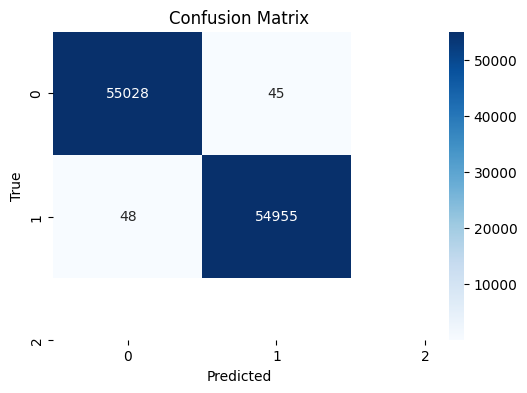

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump(voting_clf, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
y_resampled

,Class
0,0
1,0
2,0
3,0
4,0
...,...
550375,1
550376,1
550377,1
550378,1


In [ ]:
import joblib

# Load the trained model
model = joblib.load("/content/fraud_detection_model.pkl")

# Load the scaler
scaler = joblib.load("/content/scaler.pkl")


,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
# Select the last row (excluding the target column)
# Select the last row (excluding the target column)
X_last = X_resampled.iloc[550].values.reshape(1, -1)  # Reshape to 2D  # Assuming the last column is the target


In [ ]:
# Make the prediction
prediction = model.predict(X_last)[0]

# Display result
if prediction == 1:
    print("🚨 Fraudulent Transaction Detected!")
else:
    print("✅ Legitimate Transaction")



✅ Legitimate Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_resampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
